In [1]:
# Loading Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# Read the CSV file into a pandas DataFrame 
data = pd.read_excel("C:\\Users\\User\\Desktop\\Data Preprocessing1\\Final_Dataset\\Addis Ababa\\divi\\Station_satellite_App1.xlsx")
data.columns

Index(['Date', 'Name', 'Elevation', 'Lat', 'Lon', 'TMPMAX', 'TMPMIN', 'RELHUM',
       'SUNHRS', 'WINSPD', 'Air_pressure', 'Cloud_cov', 'PRECIP'],
      dtype='object')

In [3]:
# Define the independent variables 
#lon = data["Lon"].values 
#lat = data["Lat"].values 
TMPMAX = data["TMPMAX"].values 
TMPMIN = data["TMPMIN"].values
RELHUM = data["RELHUM"].values 
WINSPD = data["WINSPD"].values
Air_pressure = data["Air_pressure"].values
Cloud_cov = data["Cloud_cov"].values
SUNHRS = data["SUNHRS"].values

# Define the dependent variable 
PRECIP = data["PRECIP"].values 

In [4]:
# Calculate the concordance correlation coefficient 
mean_pred = np.mean(PRECIP) 
mean_obs = np.mean(PRECIP) 
sd_pred = np.std(PRECIP) 
sd_obs = np.std(PRECIP) 
rho_c = 2 * np.cov(PRECIP, SUNHRS)[0][1] / (sd_pred **2 + sd_obs **2 + (mean_pred - mean_obs) ** 2)


In [5]:
# Create a heatmap of the correlation matrix 
correlation_matrix = np.corrcoef([TMPMAX, TMPMIN, RELHUM, WINSPD, Air_pressure, Cloud_cov, SUNHRS, PRECIP]) 

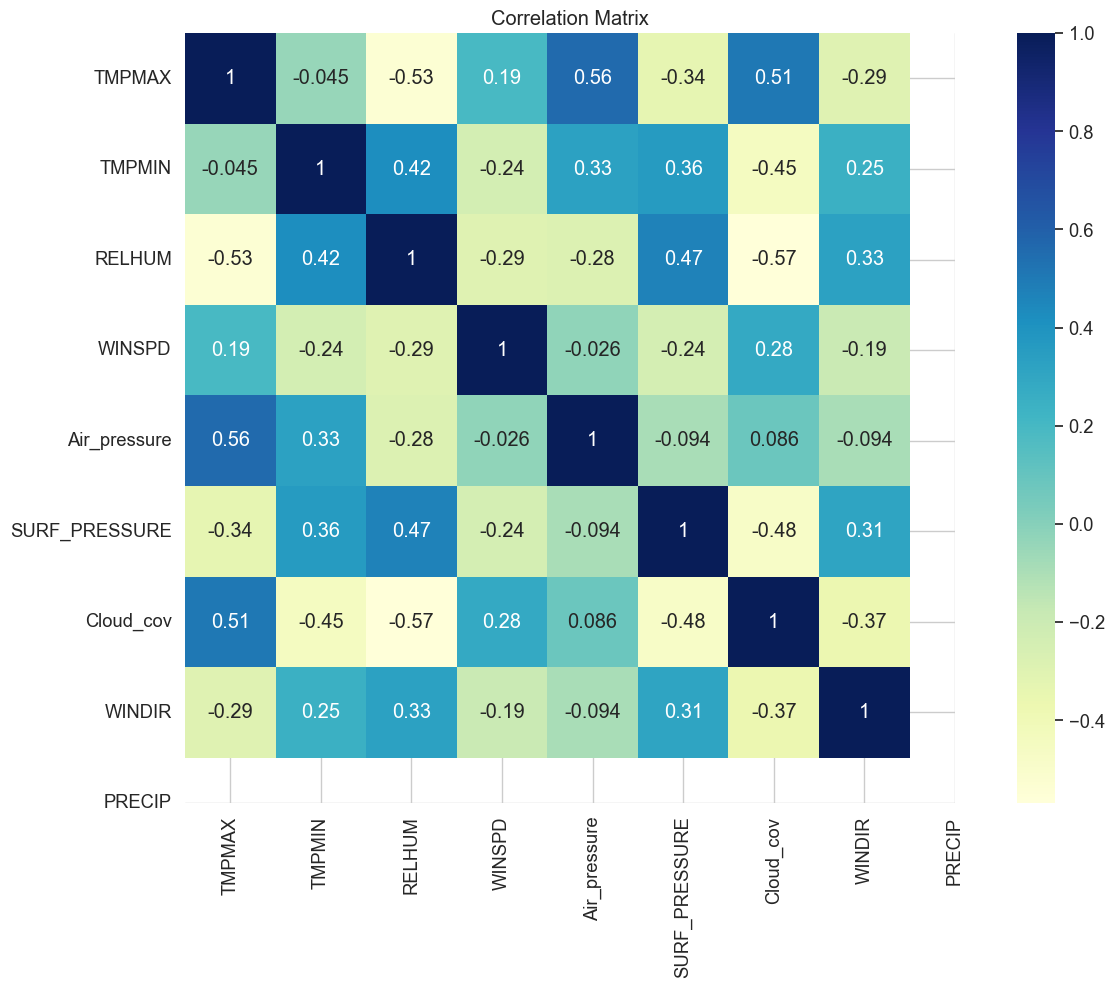

In [6]:
# Correlation matrix
sns.set(font_scale=1.2) 
sns.set_style("whitegrid") 
plt.figure(figsize=(16, 10)) 
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, square=True, xticklabels=["TMPMAX", "TMPMIN", "RELHUM", "WINSPD", "Air_pressure", "SURF_PRESSURE", "Cloud_cov", "WINDIR", "PRECIP"], yticklabels=["TMPMAX", "TMPMIN", "RELHUM", "WINSPD", "Air_pressure", "SURF_PRESSURE", "Cloud_cov", "WINDIR", "PRECIP"]) 
plt.title("Correlation Matrix") 
plt.show()

In [7]:
# Create a table of the correlation matrix 
df = pd.DataFrame(correlation_matrix, columns=["TMPMAX", "TMPMIN", "RELHUM", "WINSPD", "Air_pressure", "Cloud_cov", "WINDIR", "PRECIP"], index=["TMPMAX", "TMPMIN", "RELHUM", "WINSPD", "Air_pressure", "Cloud_cov", "WINDIR", "PRECIP"]) 
print(df) 

                TMPMAX    TMPMIN    RELHUM    WINSPD  Air_pressure  Cloud_cov  \
TMPMAX        1.000000 -0.045385 -0.532838  0.193936      0.564786  -0.335304   
TMPMIN       -0.045385  1.000000  0.417944 -0.237778      0.326538   0.359172   
RELHUM       -0.532838  0.417944  1.000000 -0.293257     -0.282476   0.471378   
WINSPD        0.193936 -0.237778 -0.293257  1.000000     -0.025774  -0.242928   
Air_pressure  0.564786  0.326538 -0.282476 -0.025774      1.000000  -0.094184   
Cloud_cov    -0.335304  0.359172  0.471378 -0.242928     -0.094184   1.000000   
WINDIR        0.506221 -0.451226 -0.568744  0.284704      0.086348  -0.478073   
PRECIP       -0.294082  0.252248  0.328838 -0.189843     -0.094418   0.307961   

                WINDIR    PRECIP  
TMPMAX        0.506221 -0.294082  
TMPMIN       -0.451226  0.252248  
RELHUM       -0.568744  0.328838  
WINSPD        0.284704 -0.189843  
Air_pressure  0.086348 -0.094418  
Cloud_cov    -0.478073  0.307961  
WINDIR        1.000000 -0